In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

#### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [3]:
claims_data=pd.read_csv('/Users/himanshusaini/Desktop/projects & assignments/Python Foundation Case Study 3 - Insurance Claims Case Study/claims.csv')
customer_data=pd.read_csv('/Users/himanshusaini/Desktop/projects & assignments/Python Foundation Case Study 3 - Insurance Claims Case Study/cust_demographics.csv')

In [4]:
claims_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [5]:
claim_id_data=pd.merge(left=customer_data,right=claims_data,right_on='customer_id',left_on='CUST_ID',how='outer')

In [6]:
claim_id_data.drop(columns='customer_id',inplace=True)

In [7]:
claim_id_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaN,NaN,NaN,NaN,97727122.0,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1103,NaN,NaN,NaN,NaN,NaN,NaN,10247193.0,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1104,NaN,NaN,NaN,NaN,NaN,NaN,79807493.0,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1105,NaN,NaN,NaN,NaN,NaN,NaN,69299345.0,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


#### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [13]:
claim_id_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [362]:
claim_id_data.dtypes

CUST_ID                float64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id               float64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [8]:
claim_id_data['DateOfBirth']=pd.to_datetime(claim_id_data.DateOfBirth,format='%d-%b-%y')
claim_id_data['claim_date']=pd.to_datetime(claim_id_data.claim_date,format='%m/%d/%Y')
claim_id_data['Contact']=pd.to_numeric(claim_id_data.Contact.str.replace('-',''))
claim_id_data['claim_amount']=pd.to_numeric(claim_id_data.claim_amount.str.replace('$',''))

In [32]:
claim_id_data['claim_amount']

0        2980.0
1        2980.0
2        3369.5
3        1950.0
4        1680.0
         ...   
1102     3059.0
1103     1520.0
1104    23575.0
1105    25120.0
1106    36685.0
Name: claim_amount, Length: 1107, dtype: float64

In [17]:
claim_id_data['Contact']

0       7.899168e+09
1       2.655431e+09
2       7.986315e+09
3       7.986315e+09
4       4.131878e+09
            ...     
1102             NaN
1103             NaN
1104             NaN
1105             NaN
1106             NaN
Name: Contact, Length: 1107, dtype: float64

In [18]:
claim_id_data['DateOfBirth']

0      1979-01-12
1      1970-01-13
2      1984-03-11
3      1984-03-11
4      1986-05-01
          ...    
1102          NaT
1103          NaT
1104          NaT
1105          NaT
1106          NaT
Name: DateOfBirth, Length: 1107, dtype: datetime64[ns]

In [19]:
claim_id_data.dtypes

CUST_ID                       float64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                       float64
Segment                        object
claim_id                      float64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
dtype: object

#### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [ ]:
claim_id_data['claim_amount']=pd.to_numeric(claim_id_data.claim_amount.str.replace('$',''))

In [16]:
claim_id_data['claim_amount']

0        2980.0
1        2980.0
2        3369.5
3        1950.0
4        1680.0
         ...   
1102     3059.0
1103     1520.0
1104    23575.0
1105    25120.0
1106    36685.0
Name: claim_amount, Length: 1107, dtype: float64

In [367]:
claim_id_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes
1103,NaN,NaN,NaT,NaN,NaN,NaN,10247193.0,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No
1104,NaN,NaN,NaT,NaN,NaN,NaN,79807493.0,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes
1105,NaN,NaN,NaT,NaN,NaN,NaN,69299345.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No


#### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [17]:
claim_id_data["flag"] =np.where(claim_id_data.police_report=='Unknown',0,1)

In [18]:
claim_id_data.drop(columns='police_report',inplace=True)

In [20]:
claim_id_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,Material only,2980.0,1.0,No,1
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Material only,2980.0,3.0,No,0
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,Material only,3369.5,1.0,Yes,1
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,Material only,1950.0,6.0,No,1
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,Material only,1680.0,1.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,2017-06-11,Auto,Material only,3059.0,4.0,Yes,1
1103,NaN,NaN,NaT,NaN,NaN,NaN,10247193.0,Natural causes,2018-03-14,Auto,Material only,1520.0,2.0,No,1
1104,NaN,NaN,NaT,NaN,NaN,NaN,79807493.0,Other driver error,2018-02-09,Auto,Material and injury,23575.0,2.0,Yes,1
1105,NaN,NaN,NaT,NaN,NaN,NaN,69299345.0,Other causes,2018-03-21,Auto,Material and injury,25120.0,1.0,No,0


#### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.
#### Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [21]:
claim=claim_id_data.groupby('CUST_ID').first().reset_index(drop=True)

In [373]:
claim.head(2)

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,NaN,1.0,Yes,1
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.0,1.0,Yes,1


#### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [22]:
claim.isna().sum()

gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                7
incident_cause          7
claim_date              7
claim_area              7
claim_type              7
claim_amount           72
total_policy_claims    17
fraudulent              7
flag                    0
dtype: int64

In [375]:
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   gender               1085 non-null   object        
 1   DateOfBirth          1085 non-null   datetime64[ns]
 2   State                1085 non-null   object        
 3   Contact              1085 non-null   float64       
 4   Segment              1085 non-null   object        
 5   claim_id             1078 non-null   float64       
 6   incident_cause       1078 non-null   object        
 7   claim_date           1078 non-null   datetime64[ns]
 8   claim_area           1078 non-null   object        
 9   claim_type           1078 non-null   object        
 10  claim_amount         1013 non-null   float64       
 11  total_policy_claims  1068 non-null   float64       
 12  fraudulent           1078 non-null   object        
 13  flag                 1085 non-nul

In [23]:
categ=['gender','State','Segment','incident_cause','claim_area','claim_type','fraudulent','flag']
conti=['claim_amount']

In [24]:
for col in categ:
    claim[col] = claim[col].fillna(claim[col].mode())
claim[conti] = claim[conti].fillna(claim[conti].mean())
claim

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,12470.498519,1.0,Yes,1
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,1
2,Male,1988-07-28,FL,3.645982e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Male,2065-01-28,UT,5.175625e+09,Silver,4549014.0,Other causes,2018-07-07,Auto,Injury only,21480.000000,1.0,No,1
1081,Female,2066-06-19,HI,4.577521e+09,Gold,35453672.0,Natural causes,2018-01-06,Auto,Material and injury,14360.000000,1.0,No,1
1082,Female,2063-11-18,NC,6.432465e+09,Silver,37305754.0,Natural causes,2018-04-04,Auto,Material only,1242.000000,1.0,Yes,1
1083,Male,1995-06-08,OR,3.952466e+09,Gold,22960702.0,Driver error,2017-11-13,Auto,Material only,2415.000000,2.0,Yes,1


#### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
#### Children Youth Adult Senior
####  < 18 18-30 30-60 > 60

In [25]:
curr_year = pd.to_datetime('today').year
dob_year = pd.DatetimeIndex(claim['DateOfBirth']).year          
x = dob_year-100                                              
v = curr_year - x
y = curr_year - dob_year
claim['Age'] = (np.where(dob_year > curr_year,v,y))

claim.loc[(claim.Age < 18),'AgeGroup'] = 'Children'
claim.loc[(claim.Age >=18) & (claim.Age <30),'AgeGroup'] = 'Youth'
claim.loc[(claim.Age >=30) & (claim.Age <60),'AgeGroup'] = 'Adult'
claim.loc[(claim.Age >=60),'AgeGroup'] = 'Senior'

In [26]:
claim.groupby('AgeGroup')[['Age']].count()

,Age
AgeGroup,
Adult,799
Senior,76
Youth,210


#### 8. What is the average amount claimed by the customers from various segments?

In [27]:
claim.groupby('Segment')[['claim_amount']].mean()

,claim_amount
Segment,
Gold,12755.710930
Platinum,12370.138663
Silver,12271.163192


#### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [28]:
claim.loc[claim.claim_date<'2018-9-11',:].groupby('incident_cause')['claim_amount'].sum().add_prefix('Total ')

incident_cause
Total Crime                 7.244625e+05
Total Driver error          3.264286e+06
Total Natural causes        1.312706e+06
Total Other causes          3.725038e+06
Total Other driver error    3.318806e+06
Name: claim_amount, dtype: float64

#### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [29]:
claim.loc[(claim.incident_cause=='Driver error')&(claim.State=='TX')|(claim.State=='DE')|(claim.State=='AK')].groupby('State')['State'].count()

State
AK    19
DE    29
TX     6
Name: State, dtype: int64

#### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

array([<AxesSubplot:ylabel='Gold'>, <AxesSubplot:ylabel='Platinum'>,
       <AxesSubplot:ylabel='Silver'>], dtype=object)

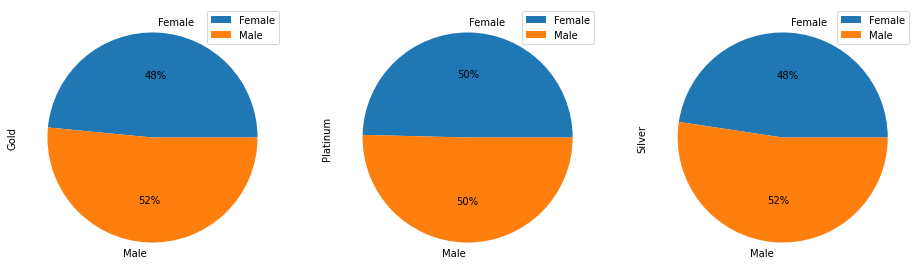

In [30]:
total_per=claim.pivot_table(index='gender',values='claim_amount',columns='Segment')
total_per.plot(kind='pie',subplots=True,figsize=(16,8),autopct='%.0f%%')



#### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [224]:
claim.head(2)

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,12470.498519,1.0,Yes,0.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,0.0


In [31]:
gen_count=claim.loc[(claim.incident_cause=='Driver error')|(claim.incident_cause=='Other driver error'),:].groupby('gender')[['gender']].count().add_prefix('total_count_of_')

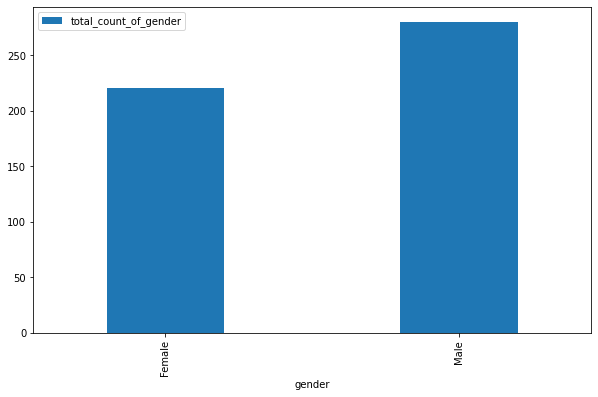

In [32]:
gen_count.plot(kind='bar',figsize=(10,6),width=0.4,)
plt_title=('Total_count')

#### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [33]:
claim['Max']=np.where(claim.fraudulent == 'Yes',0,1)

In [34]:
New_data=claim.groupby('AgeGroup')[['Max']].count()

In [35]:
New_data

,Max
AgeGroup,
Adult,799
Senior,76
Youth,210


Text(0.5, 0, 'AgeGroup')

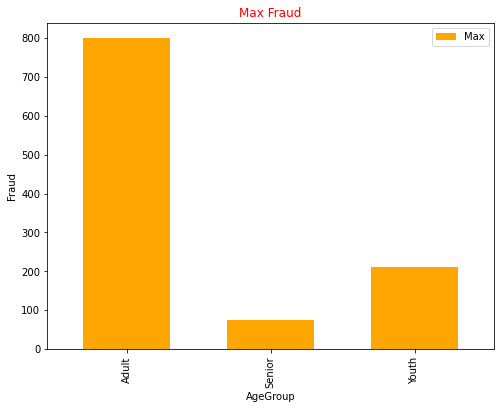

In [36]:
New_data.plot(kind='bar',figsize=(8,6),width=(0.6),color='orange')
plt.title("Max Fraud",color='red')
plt.ylabel('Fraud')
plt.xlabel("AgeGroup")

##### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [37]:
claim['claim_month']=claim['claim_date'].dt.month


Text(0.5, 1.0, 'Total amount')

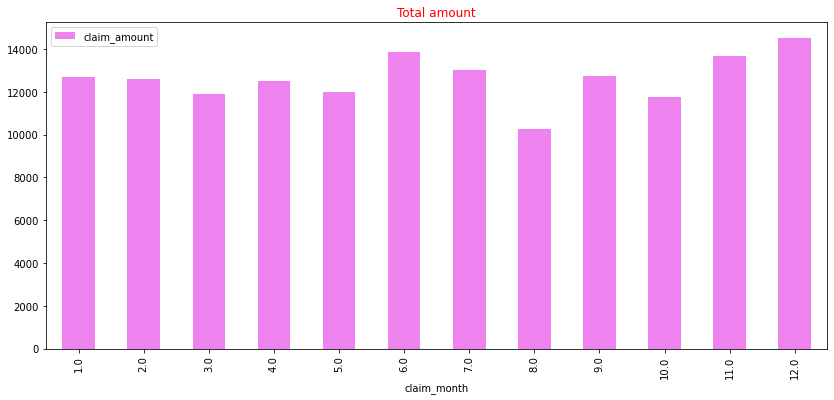

In [38]:
pd.pivot_table(claim,index='claim_month',values='claim_amount').plot(kind='bar',figsize=(14,6),color='violet')
plt.title("Total amount",color='red')

#### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.
Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.m

In [39]:
claim.head(2)

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,AgeGroup,Max,claim_month
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,12470.498519,1.0,Yes,1,44,Adult,0,4.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,1,50,Adult,0,4.0


In [40]:
fraud=claim.loc[claim.fraudulent=='Yes'].groupby(['gender','AgeGroup'])[['claim_amount']].mean().add_prefix('fraud_')
Non_fraud=claim.loc[claim.fraudulent=='No'].groupby(['gender','AgeGroup'])[['claim_amount']].mean().add_prefix('Non_fraud_')

In [41]:
Non_fraud

Non_fraud_claim_amount
gender AgeGroup                        
Female Adult               12015.891852
       Senior              14957.624630
       Youth               13172.623365
Male   Adult               12183.879708
       Senior              12605.699901
       Youth               12087.420354

In [42]:
Claims_age_gender=round(pd.merge(fraud,Non_fraud, on=["gender","AgeGroup"]),2)

Claims_age_gender

fraud_claim_amount  Non_fraud_claim_amount
gender AgeGroup                                            
Female Adult               12527.42                12015.89
       Senior               3779.08                14957.62
       Youth                9214.55                13172.62
Male   Adult               16281.50                12183.88
       Senior              16879.12                12605.70
       Youth                7797.89                12087.42

array([<AxesSubplot:title={'center':'fraud_claim_amount'}, xlabel='gender,AgeGroup'>,
       <AxesSubplot:title={'center':'Non_fraud_claim_amount'}, xlabel='gender,AgeGroup'>],
      dtype=object)

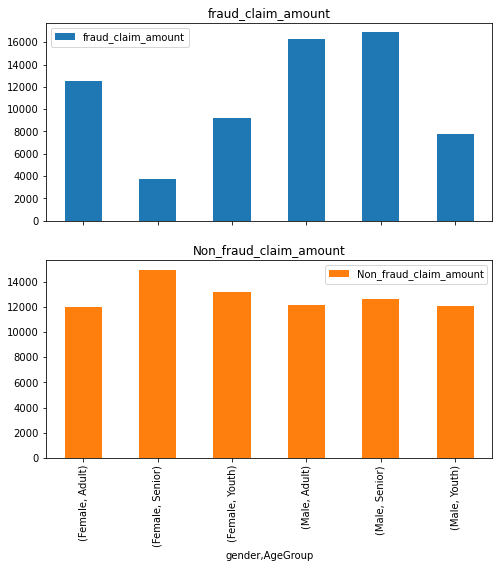

In [483]:
Claims_age_gender.plot(kind='bar',subplots=True,figsize=(8,8))

#### 16. Is there any similarity in the amount claimed by males and females? 

In [43]:
Males_claim=round(claim['claim_amount'].loc[claim.gender=='Male'],2)

In [44]:
females_claim=round(claim['claim_amount'].loc[claim.gender=='Female'],2)

In [45]:
Males_claim

1       39192.0
2        1621.5
3       37040.0
5        2630.0
6        2920.0
         ...   
1074     2370.0
1079     2260.0
1080    21480.0
1083     2415.0
1084     2310.0
Name: claim_amount, Length: 553, dtype: float64

In [499]:
females_claim

0       12470.5
4       35250.0
7       21190.0
9        2507.0
10      25010.0
         ...   
1076    20033.0
1077     3139.5
1078     1495.0
1081    14360.0
1082     1242.0
Name: claim_amount, Length: 532, dtype: float64

In [57]:
equal_v = stats.ttest_ind(a= Males_claim,b= females_claim,equal_var=True)    
equal_v.statistic



0.8848199804885036

In [58]:
unequal_v = stats.ttest_ind(a= Males_claim,b= females_claim,equal_var=False)    
unequal_v.statistic


0.8854208637908283

In [59]:
t= equal_v.statistic
p= equal_v.pvalue

print(" For the above test, the t-score is {} and the p-value is {}".format(t,p))

if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')


 For the above test, the t-score is 0.8848199804885036 and the p-value is 0.37645012955574586
We fail to reject null hypothesis


#### 17. Is there any relationship between age category and segment?

In [63]:
claim.head(2)

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,AgeGroup,Max,claim_month
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,12470.498519,1.0,Yes,1,44,Adult,0,4.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,1,50,Adult,0,4.0


In [61]:
Age_Seg= pd.crosstab(claim.AgeGroup, claim.Segment, margins = True)
Age_Seg


Segment,Gold,Platinum,Silver,All
AgeGroup,,,,
Adult,273,268,258,799
Senior,28,26,22,76
Youth,71,70,69,210
All,372,364,349,1085


In [64]:
Chi_test = stats.chi2_contingency(observed= Age_Seg)
Chi_test

(0.4546321740231326,
 0.9999797946451449,
 9,
 array([[ 273.94285714,  268.0516129 ,  257.00552995,  799.        ],
        [  26.05714286,   25.49677419,   24.44608295,   76.        ],
        [  72.        ,   70.4516129 ,   67.5483871 ,  210.        ],
        [ 372.        ,  364.        ,  349.        , 1085.        ]]))

In [65]:
print("The chi square stat is {} and the p value is {}".format(Chi_test[0],Chi_test[1]))

The chi square stat is 0.4546321740231326 and the p value is 0.9999797946451449


#### 18. The current year has shown a significant rise in claim amounts as
compared to 2016-17 fiscal average which was $10,000.

In [66]:
claim.head(2)

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,AgeGroup,Max,claim_month
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,12470.498519,1.0,Yes,1,44,Adult,0,4.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,1,50,Adult,0,4.0


In [73]:
claim["Year"]=claim['claim_date'].dt.year

In [75]:
Current_year= claim.loc[claim.Year == 2018]["claim_amount"]
amt_2016_17= claim.loc[claim.Year==2017]["claim_amount"]

In [ ]:
stats.pearsonr(Current_year,amt_2016_17)

#### 19. Is there any difference between age groups and insurance claims?

In [82]:
Age_group_1 = claim['total_policy_claims'].loc[claim['AgeGroup']=="Youth"]
Age_group_2 = claim['total_policy_claims'].loc[claim['AgeGroup']=="Adult"]
anova = stats.f_oneway(Age_group_1,Age_group_2 )
f = anova.statistic
p = anova.pvalue


In [85]:
print("The f-value is {} and the p value is {}".format(f,p))
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

The f-value is nan and the p value is nan
We fail to reject null hypothesis


#### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [87]:
claim['total_policy_claims'] = pd.to_numeric(claim['total_policy_claims'])

In [89]:
claim.total_policy_claims.corr(other= claim.claim_amount)

-0.01436903613753471

As the correlation is negative the number of policy claims in inversely propotional to the claimed amount.